# Faster R-CNN

https://arxiv.org/pdf/1506.01497.pdf

R-CNN base 모델로 Region Proposal Network(RPN) 을 이용하여 selective search 를 이용하는 다른 모델에 비해 매우 빠른 성능을 가짐  



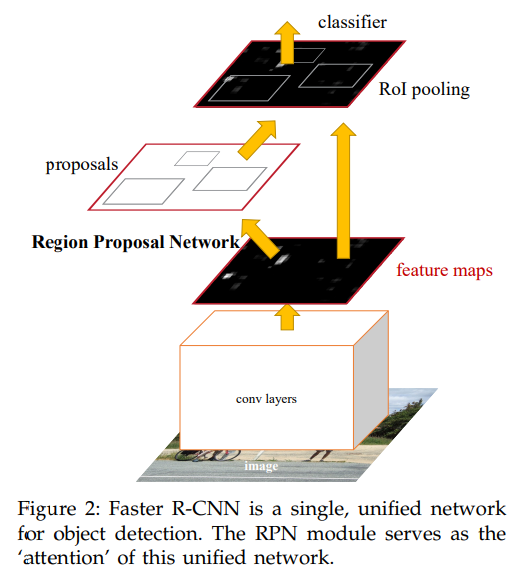

Fast R-CNN 의 region proposal 추출은 selective search 를 이용하는데 이때 CNN(classification, bounding box regression) 외부에서 연산(CPU)하므로 병목현상이 발생한다.  

Faster R-CNN은 region proposal 을 CNN을 이용하여 GPU에 올릴 수 있도록하여 end-to-end 방식으로 학습할 수 있게 했다.

이때 classfication, bounding box regression 은 Fast R-CNN 을 이용한다. 

### RPN

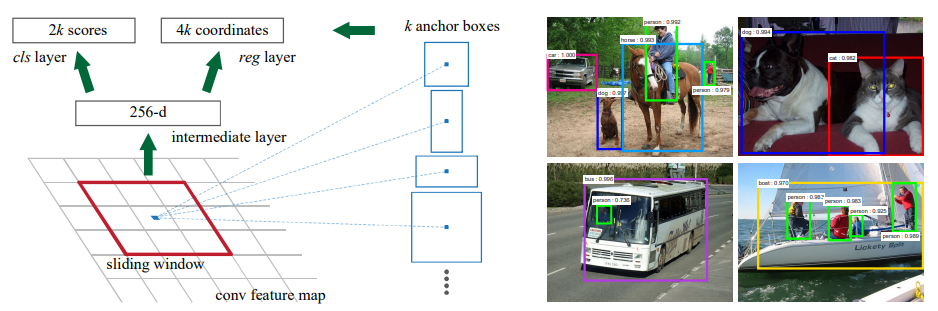

RPN은 CNN 을 통해 얻은 feature map이 input이고, anchor box를 이용한다.  

anchor box는 나중에 bounding box로 사용하기 위해 미리 모양, 스케일을 정해놓는다. 논문에서는 모양 3개, 스케일3개로 총 9개의 anchor box 사용한다.  

anchor box를 sliding 하면서 256-d 로 mapping 하고 classification layer, regression layer를 통해 예측을 수행한다.

classification 에서는 다음과 같이 label 할당하여 log loss 를 계산
 - highest IoU or IoU > 0.7 : positive label
 - IoU < 0.3 : negative label

regression 에서는 bbox에 object가 있을 경우에만 ground-truth와의 smooth L1 Loss를 계산하여 학습한다.

### 4-step alternating training

1. train RPN (fine-tune region proposal task) 
2. train Fast RCNN detector (using step 1 RPN)
3. fix CNN and detector > fine-tuning RPN
4. fix CNN and RPN > fine-tuning detector

### Experiments


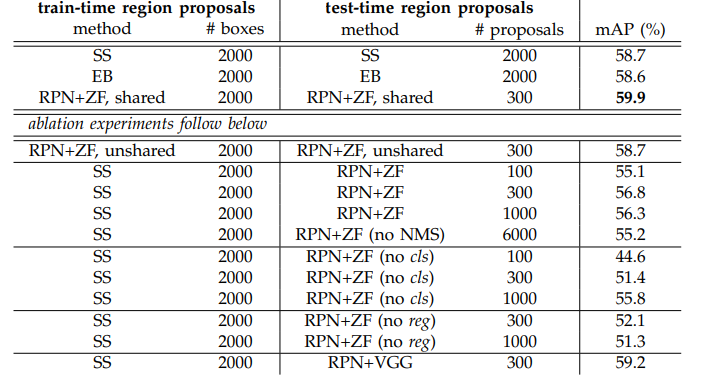

PASCAL VOC 2007 results

# ..

SPPnet, Fast R-CNN  

object detection : 위치와 분류 하는 task

fast rcnn : region proposals 로 인한 시간 소요  
> RPN으로 해결  

RPN, detection network가 하나의 cnn feature를 통해 계산되므로 시간이 줄어듦  

RPN은 위치에 존재하는지 아닌지만 판단 클래스 분류는 x  
일종의 attention mechanism, 
end-to-end 방식으로 학습가능!  



region based cnn은 계산 비용이 큼  
2000개의 region proposal 구하기 > 하나의 cnn에 넣어서 feature구하기(region proposal은 cpu)

region proposals
1. selective search
 - cpu 수행, 2초 정도 수행 (느림)
2. edge box
 - 살짝 빠름
RPN(FCN) > 10ms 소요, 
 - region bounds regression
 - objectness score
 - 다양한 스케일의 박스를 이용하여 물체의 다양한 모양을 커버
 - anchor box 사용(9개), 피라미드와 비교

alternate training 
 - region proposal task
 - object detection
  > fast convergence, feature sharing

Dataset
 VOC, COCO


object proposal method

 - seletive search, sliding window

DN for OD
 - DN을 통해 바운딩 박스 찾기

Fast RCNN + RPN 인 느낌

1. RPN

fast rcnn 과 피쳐맵 공유, 이때 피쳐맵은 vgg, zfnet 등을 이용하여 얻을 수 있음

과정은 cnn 을 통해 feature map을 얻고, k anchor boxes 를 통해 sliding을 하면서 각 위치에 대한 prediction을 수행(256D 로 mapping)  
이후 classification layer, regression layer 를 통해 물체가 존재하는지 안하는지, 존재한다면 어디에 존재하는지 위치(좌표값)  


!translation invariant  

multi scale prediction
1. based on image/feature pyramids 
 - 이미지 크기를 변경하면서 각각의 스케일에 맞다 feature 계산 > 시간 비효율적
2. use sliding windows of multiple scales
 - 
3. anchor method
 - 한번의 convolution layer를 통해서 여러 anchor를 이용하여 처리  

Loss function  

RPN : binary classification to each anchor, positive label은 IoU>=0.7 negative label은 IoU<=0.3 둘중 무엇도 아니면 training object에 영향 x 

Alternating training 
 - RPN 학습 후 Fast RCNN detector 를 번갈아가며 학습

approximate joint training
 - 한번에 학습 구현은 간단하지만 정확도 떨어짐  

non-approximate joint training
 - 어려움 alternating 방법을 쓰자

4-step
1. RPN 만 학습
2. RPN 의 proposal을 이용해서 fast rcnn 학습
3. 처음 cnn 고정 RPN 학습
4. 처음 cnn 고정 fast rcnn 만 학습

cross boundary anchor는 loss에 기여하지 않도록(무시) 중복제거를 위해 Non-maximum suppression 이용(thresh=0.7)

